In [1]:
%load_ext autoreload
%autoreload 2

# Importing libraries

In [2]:
import os
import sys

sys.path.append("../src/")

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
from motion_detection import BasicDetector, AverageDetector, MogDetector
from frames_convertion import frequency_conversion

# Loading background and object images

In [ ]:
background = cv2.imread("../../data/car_bottom/car_bottom1.jpg")[..., ::-1]
bomb = cv2.imread("../../data/bombs/c4_csgo.webp")[..., ::-1]

In [ ]:
plt.imshow(background)

In [ ]:
plt.imshow(bomb)

In [ ]:
print(f"Background shape: {background.shape} \t Bomb shape: {bomb.shape}")

In [ ]:
bomb = cv2.resize(bomb, (128, 128))

In [ ]:
print(bomb.shape)
plt.imshow(bomb)

# BasicDetector test

In [ ]:
basic_detector = BasicDetector(background, 120)

## Creating a test image

In [ ]:
x_offset, y_offset = 1000, 250
x_width, y_height = bomb.shape[:2]
frame_img = background.copy()
frame_img[y_offset:y_offset+y_height, x_offset:x_offset+x_width] = bomb

In [ ]:
plt.imshow(frame_img)

## Testing motion detection

In [ ]:
bboxes = basic_detector.detect(frame_img)

In [ ]:
len(bboxes)

## Drawing bboxes

In [ ]:
frame_img_annot = frame_img.copy()
x, y, w, h = bboxes[0]
cv2.rectangle(frame_img_annot, (x, y), (x+w, y+h), color=(0, 255, 0), thickness=4)

In [ ]:
plt.figure(figsize=(16, 9))
plt.imshow(frame_img_annot)
plt.show()

# AverageDetector test

In [ ]:
average_detector = AverageDetector(alpha=0.5)

## Loading test video

In [ ]:
video.release()

In [ ]:
video = cv2.VideoCapture("../data/videos/video6.mp4")

In [ ]:
output_frames = []
output_frames_diffs = []
while True:
    is_read, frame = video.read()
    if not is_read:
        break
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    output_frames_diffs.append(average_detector.get_frame_difference(frame, 50))
    detections = average_detector.detect(frame, threshold=50)
    for detection in detections:
        x, y, width, height = detection
        cv2.rectangle(frame, (x, y), (x+width, y+height), thickness=8, color=(0, 0, 255))
        
    output_frames.append(frame)
        
video.release()

In [ ]:
height, width = output_frames[-1].shape[:2]
video_writer = cv2.VideoWriter(
    "video6-with-detection.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    30,
    (width, height)
)

In [ ]:
for frame in output_frames:
    video_writer.write(frame)
    
video_writer.release()

In [ ]:
len(output_frames)

In [ ]:
plt.imshow(output_frames[80])

In [ ]:
plt.figure(figsize=(16, 9))
plt.imshow(output_frames_diffs[55], cmap="gray")
plt.show()

In [ ]:
height, width = output_frames_diffs[-1].shape[:2]
video_writer = cv2.VideoWriter(
    "video6-frames-diffs.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    30,
    (width, height)
)

In [ ]:
for frame in output_frames_diffs[1:]:
    video_writer.write(frame)
    
video_writer.release()

# Test data generation

In [28]:
background_rect = cv2.imread("../data/pictures/blue_rectangle.jpg")[..., ::-1]
foreground_rect = cv2.imread("../data/pictures/purple_rectangle.png")[..., ::-1]

# background_rect = cv2.imread("../../data/car_bottom/car_bottom2.png")[..., ::-1]
# foreground_rect = cv2.imread("../../data/bombs/c4_csgo.webp")[..., ::-1]

In [38]:
foreground_rect = foreground_rect[30:210, 30:220]

In [39]:
background_rect.shape, foreground_rect.shape

((468, 720, 3), (126, 120, 3))

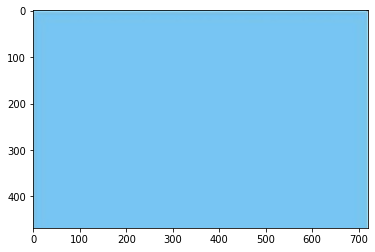

In [40]:
plt.imshow(background_rect)

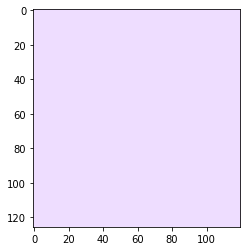

In [41]:
plt.imshow(foreground_rect)

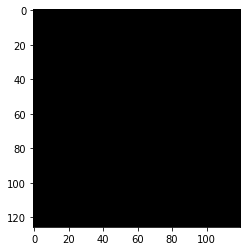

In [42]:
plt.imshow(cv2.cvtColor(foreground_rect, cv2.COLOR_BGR2GRAY), cmap="gray")

In [43]:
foreground_rect = cv2.resize(foreground_rect, (64, 64))

In [29]:
# foreground_rect_img = Image.fromarray(foreground_rect)
# foreground_rect_mask = Image.fromarray((foreground_rect < 255).astype(np.uint8) * 255).convert("L")

In [44]:
generated_frames = [background_rect]
for i in range(300):
    x, y, width, height = 10 + i, 150, foreground_rect.shape[1], foreground_rect.shape[0]
    generated_frame = background_rect.copy()
    generated_frame[y:y+height, x:x+width] = foreground_rect
    generated_frames.append(generated_frame)c

#     generated_frame = Image.fromarray(background_rect)
#     generated_frame.paste(foreground_rect_img, (x, y), mask=foreground_rect_mask)
#     generated_frames.append(np.asarray(generated_frame, np.uint8))

In [45]:
len(generated_frames)

301

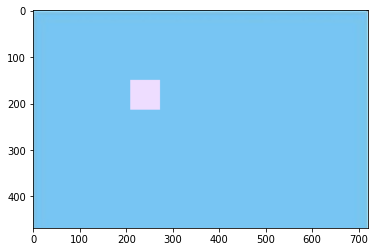

In [46]:
plt.imshow(generated_frames[200])

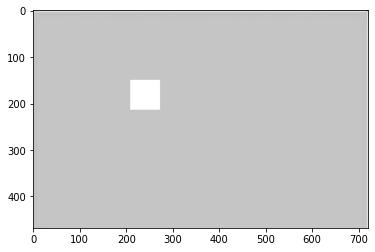

In [50]:
plt.imshow(cv2.cvtColor(generated_frames[200], cv2.COLOR_RGB2GRAY), cmap="gray")

## BasicDetector

In [51]:
basic_detector = BasicDetector(background_rect, 20)
frames_diffs_basic = []
for frame in generated_frames:
    frames_diffs_basic.append(basic_detector.get_frame_difference(frame, 20))

In [52]:
len(frames_diffs_basic)

301

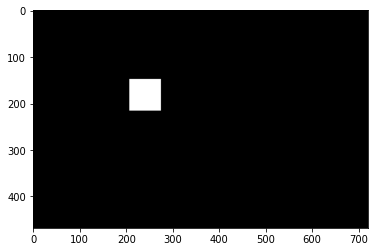

In [53]:
plt.imshow(frames_diffs_basic[200], cmap="gray")

## AverageDetector

In [39]:
average_detector = AverageDetector()
frames_diffs_average = []
for frame in generated_frames:
    frames_diffs_average.append(average_detector.get_frame_difference(frame, 20))

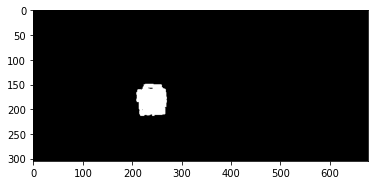

In [40]:
plt.imshow(frames_diffs_average[200], cmap="gray")

## MogDetector

In [41]:
mog_detector = MogDetector()
frames_diffs_mog = []
for frame in generated_frames:
    frames_diffs_mog.append(mog_detector.get_frame_difference(frame))

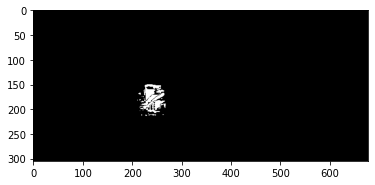

In [42]:
plt.imshow(frames_diffs_mog[200], cmap="gray")

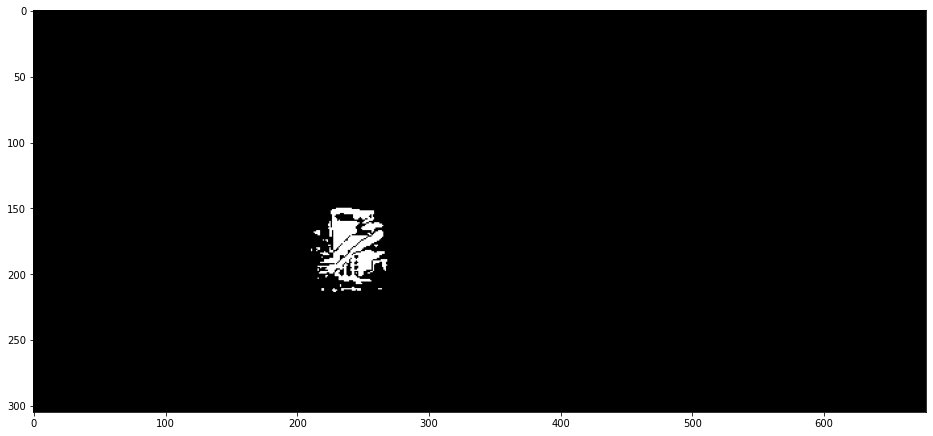

In [43]:
plt.figure(figsize=(16, 9))
plt.imshow(frames_diffs_mog[200], cmap="gray")
plt.show()

## Frequency conversion

In [44]:
frames_diffs_freq_conv = frequency_conversion(generated_frames, 20, step=1)

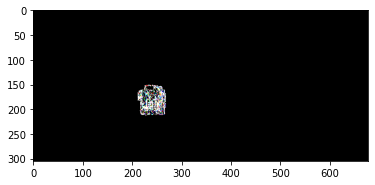

In [45]:
plt.imshow(frames_diffs_freq_conv[200], cmap="gray")

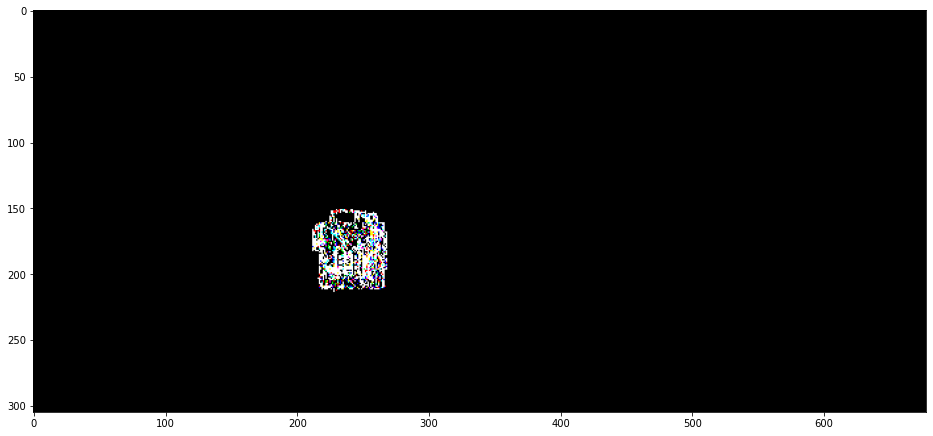

In [46]:
plt.figure(figsize=(16, 9))
plt.imshow(frames_diffs_freq_conv[200], cmap="gray")
plt.show()

## Write results

### Basic

In [47]:
height, width = generated_frames[0].shape[:2]
video_writer = cv2.VideoWriter(
    "bomb1-generated-data-test-basic.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    30,
    (width, height),
    isColor=False
)

In [48]:
for frame in frames_diffs_basic:
    video_writer.write(frame)
    
video_writer.release()

###  Average

In [49]:
height, width = generated_frames[0].shape[:2]
video_writer = cv2.VideoWriter(
    "bomb1-generated-data-test-average.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    30,
    (width, height),
    isColor=False
)

In [50]:
for frame in frames_diffs_average[1:]:
    video_writer.write(frame)
    
video_writer.release()

### Mog

In [51]:
height, width = generated_frames[0].shape[:2]
video_writer = cv2.VideoWriter(
    "bomb1-generated-data-test-mog.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    30,
    (width, height),
    isColor=False
)

In [52]:
for frame in frames_diffs_mog:
    video_writer.write(frame)
    
video_writer.release()

### Frequency difference

In [53]:
height, width = generated_frames[0].shape[:2]
video_writer = cv2.VideoWriter(
    "bomb1-generated-data-test-freq-conv.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    30,
    (width, height),
    isColor=True
)

In [54]:
for frame in frames_diffs_freq_conv:
    video_writer.write(frame)
    
video_writer.release()

## Detection test

### Basic

In [54]:
basic_detector = BasicDetector(background_rect, 20)
output_frames_basic = []
for frame in generated_frames:
    detections = basic_detector.detect(frame)
    
    frame_annot = frame.copy()
    for detection in detections:
        x, y, width, height = detection
        cv2.rectangle(frame_annot, (x, y), (x+width, y+height), color=(255, 0, 0), thickness=2)
        
    output_frames_basic.append(frame_annot)

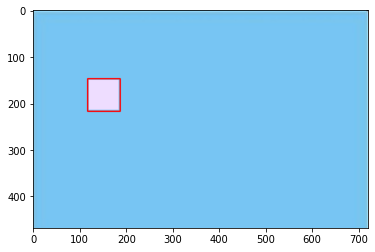

In [55]:
plt.imshow(output_frames_basic[111])

In [57]:
detections

[(309, 149, 62, 65)]

In [70]:
def write_video(frames, name, is_colored=True):
    height, width = frames[0].shape[:2]
    video_writer = cv2.VideoWriter(
        f"{name}.mp4",
        cv2.VideoWriter_fourcc(*"mp4v"),
        30,
        (width, height),
        isColor=is_colored
    )
    
    for frame in frames:
        video_writer.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

    video_writer.release()

In [59]:
write_video(output_frames_basic, "bomb1-detections-basic", is_colored=True)

### Average

In [60]:
average_detector = AverageDetector(background_rect, 20, 0.5)
output_frames_average = []
for frame in generated_frames:
    detections = average_detector.detect(frame)
    
    frame_annot = frame.copy()
    for detection in detections:
        x, y, width, height = detection
        cv2.rectangle(frame_annot, (x, y), (x+width, y+height), color=(255, 0, 0), thickness=2)
        
    output_frames_average.append(frame_annot)

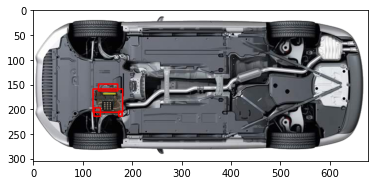

In [71]:
plt.imshow(output_frames_average[111])

In [72]:
write_video(output_frames_average, "bomb1-detections-average", is_colored=True)

In [73]:
detections

[(316, 186, 13, 11), (311, 157, 56, 51)]

### Mog

In [64]:
mog_detector = MogDetector()
output_frames_mog = []
for frame in generated_frames:
    detections = mog_detector.detect(frame)
    
    frame_annot = frame.copy()
    for detection in detections:
        x, y, width, height = detection
        cv2.rectangle(frame_annot, (x, y), (x+width, y+height), color=(255, 0, 0), thickness=2)
        
    output_frames_mog.append(frame_annot)

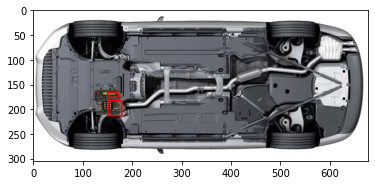

In [65]:
plt.imshow(output_frames_mog[111])

In [66]:
write_video(output_frames_mog, "bomb1-detections-mog", is_colored=True)

### Frequency conversion

In [67]:
output_frames_freq_conv = []
for i, frame in enumerate(generated_frames[1:]):
    contours, _ = cv2.findContours(
        cv2.cvtColor(frames_diffs_freq_conv[i], cv2.COLOR_RGB2GRAY),
        mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE
    )
    bboxes = []
    for contour in contours:
#         if cv2.contourArea(contour) < 50:
#             continue

        # x, y, width, height = cv2.boundingRect(contour)
        bboxes.append(cv2.boundingRect(contour))
        
    frame_annot = frame.copy()
    for bbox in bboxes:
        x, y, width, height = bbox
        cv2.rectangle(frame_annot, (x, y), (x+width, y+height), color=(255, 0, 0), thickness=1)
        
    output_frames_freq_conv.append(frame_annot)

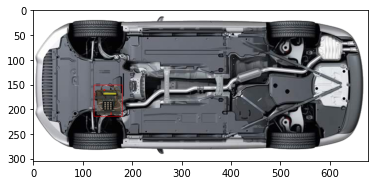

In [68]:
plt.imshow(output_frames_freq_conv[111])

In [69]:
write_video(output_frames_freq_conv, "bomb1-detections-freq", is_colored=True)

---

In [15]:
tmp_back = background_rect.copy()

In [17]:
tmp_back = Image.fromarray(tmp)

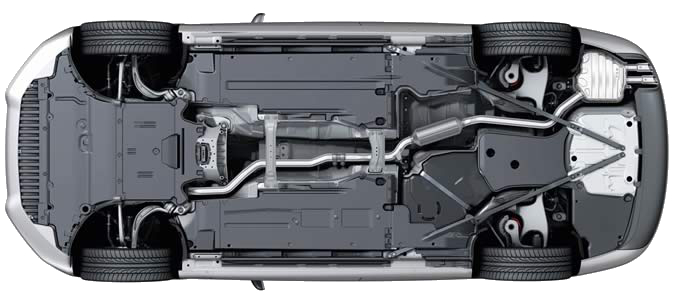

In [18]:
tmp_back

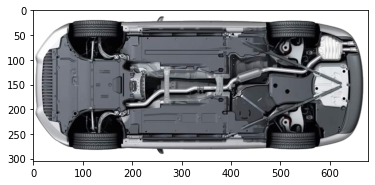

In [19]:
plt.imshow(tmp_back)

In [20]:
tmp_mask = (foreground_rect < 255).astype(np.uint8) * 255

In [22]:
tmp_mask = Image.fromarray(tmp_mask)

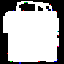

In [23]:
tmp_mask

In [24]:
tmp_obj = Image.fromarray(foreground_rect)

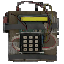

In [25]:
tmp_obj

In [27]:
tmp_back.paste(tmp_obj, box=(250, 150), mask=tmp_mask.convert("L"))

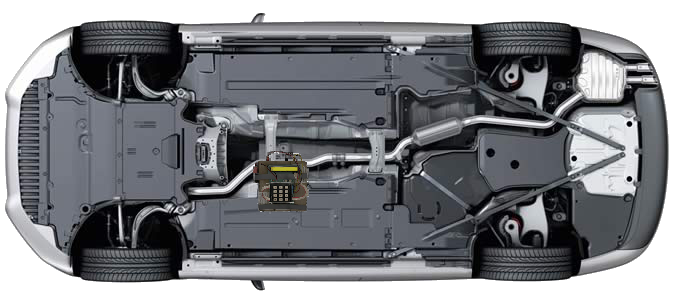

In [28]:
tmp_back